# Regression between sea level height and the dangendorf wind proxies for observational data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [102]:
%load_ext autoreload
%autoreload 2

from code import import_data as imprt
from code import regression as regres
from code import figures as figs
from code import practical_functions as pf


data_type = 'era5'
model = 'Dangendorf'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot tide gauge data

In [103]:
# Open data file
tg_data = imprt.import_obs_slh_data()

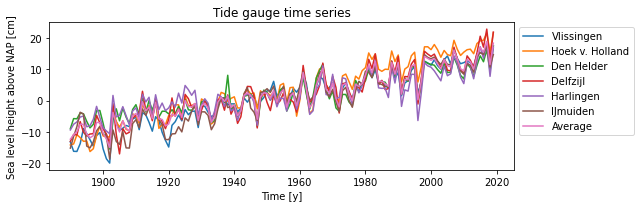

In [104]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [105]:
pres_data = imprt.import_obs_wind_data(model = 'Dangendorf', data_type = 'era5')

In [106]:
pres_data

,Negative corr region,Positive corr region
time,,
1950,100860.789062,101706.679688
1951,100909.242188,101633.406250
1952,100948.703125,101704.281250
1953,101167.054688,101741.234375
1954,100871.156250,101678.546875
...,...,...
2016,101106.015625,101755.867188
2017,100909.265625,101818.640625
2018,101164.859375,101647.007812


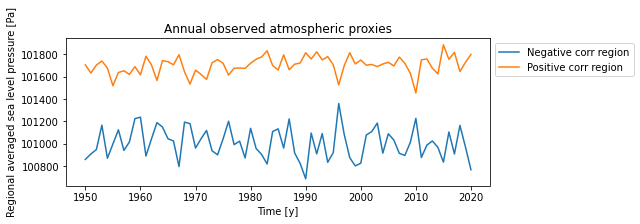

In [107]:
figs.plot_obs_pres_data(pres_data, model)

### Perform regression

In [108]:
results, timeseries = regres.regression_obs(pres_data, tg_data, wind_model = model, data_type = data_type)

In [109]:
results

,R$^2$,R$^2_{wind}$,R$^2_{neg}$,R$^2_{pos}$,RMSE,constant,Negative corr region,Positive corr region,trend
station,,,,,,,,,
Vlissingen,0.749603,0.149634,0.130089,0.157570,2.448219,7.443519,-1.304326,0.234689,3.871398
Hoek v. Holland,0.861594,0.189112,0.173226,0.187513,2.416906,10.125966,-2.109186,0.250433,5.436496
Den Helder,0.754376,0.332425,0.258454,0.299973,2.521845,6.457537,-1.759572,0.926873,3.395173
Delfzijl,0.803075,0.294703,0.213166,0.283326,2.841808,7.728797,-1.871612,1.169226,4.696079
Harlingen,0.752956,0.407235,0.359393,0.317941,2.683841,5.931749,-2.535320,0.758478,3.250032
IJmuiden,0.745405,0.263507,0.207442,0.246203,2.582204,7.272730,-1.612315,0.705631,3.644518
Average,0.823809,0.284820,0.232760,0.262166,2.259196,7.493385,-1.865380,0.674229,4.048955


In [110]:
timeseries

Vlissingen                                                      \
     Negative corr region Positive corr region     trend     total wind total   
time                                                                            
1950             1.399050             0.011920 -6.611670 -5.200700   1.410970   
1951             0.935420            -0.206872 -6.422765 -5.694217   0.728548   
1952             0.557833             0.004759 -6.233861 -5.671269   0.562592   
1953            -1.531490             0.115099 -6.044956 -7.461346  -1.416391   
1954             1.299850            -0.072083 -5.856051 -4.628284   1.227767   
...                   ...                  ...       ...       ...        ...   
2016            -0.947430             0.158792  5.856051  5.067413  -0.788638   
2017             0.935196             0.346232  6.044956  7.326383   1.281428   
2018            -1.510484            -0.166258  6.233861  4.557119  -1.676742   
2019             0.324150             0.077098  6.422765  6.824013   0.401248   
2020             2.279512             0.290175  6.611670  9.181358   2.569687   

          Hoek v. Holland                                            \
     Negative corr region Positive corr region     trend      total   
time                                                                  
1950             2.262361             0.012720 -9.284585  -7.009504   
1951             1.512640            -0.220750 -9.019311  -7.727421   
1952             0.902056             0.005078 -8.754037  -7.846904   
1953            -2.476527             0.122821 -8.488763 -10.842469   
1954             2.101949            -0.076919 -8.223490  -6.198460   
...                   ...                  ...       ...        ...   
2016            -1.532061             0.169445  8.223490   6.860873   
2017             1.512277             0.369459  8.488763  10.370500   
2018            -2.442558            -0.177412  8.754037   6.134067   
2019             0.524173             0.082270  9.019311   9.625754   
2020             3.686131             0.309641  9.284585  13.280358   

                 ...             IJmuiden                                 \
     wind total  ... Negative corr region Positive corr region     trend   
time             ...                                                       
1950   2.275081  ...             1.729406             0.035840 -6.224200   
1951   1.291890  ...             1.156300            -0.621995 -6.046366   
1952   0.907133  ...             0.689554             0.014307 -5.868532   
1953  -2.353706  ...            -1.893119             0.346065 -5.690697   
1954   2.025029  ...             1.606782            -0.216731 -5.512863   
...         ...  ...                  ...                  ...       ...   
2016  -1.362616  ...            -1.171146             0.477436  5.512863   
2017   1.881736  ...             1.156023             1.041004  5.690697   
2018  -2.619970  ...            -1.867153            -0.499882  5.868532   
2019   0.606443  ...             0.400691             0.231809  6.046366   
2020   3.995773  ...             2.817771             0.872459  6.224200   

                                       Average                                 \
         total wind total Negative corr region Positive corr region     trend   
time                                                                            
1950 -4.458954   1.765246             2.000849             0.034245 -6.914907   
1951 -5.512061   0.534305             1.337790            -0.594314 -6.717339   
1952 -5.164670   0.703861             0.797785             0.013671 -6.519770   
1953 -7.237751  -1.547054            -2.190259             0.330665 -6.322201   
1954 -4.122812   1.390051             1.858979            -0.207086 -6.124632   
...        ...        ...                  ...                  ...       ...   
2016  4.819153  -0.693710            -1.354966             0.456189  6.124632   
2017  7.88

#### Plot regression results

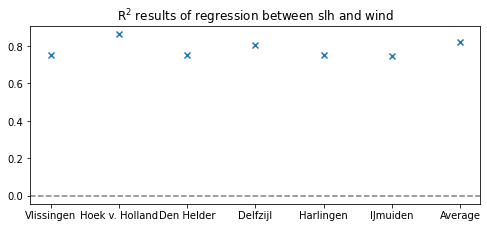

In [111]:
figs.plot_obs_result_per_station(results, 'R$^2$', model, data_type)

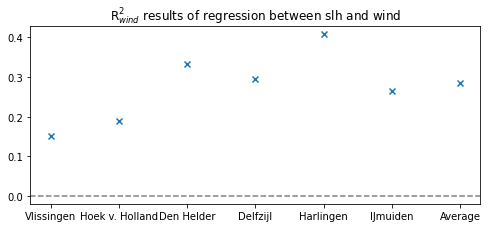

In [112]:
figs.plot_obs_result_per_station(results, 'R$^2_{wind}$', model, data_type)

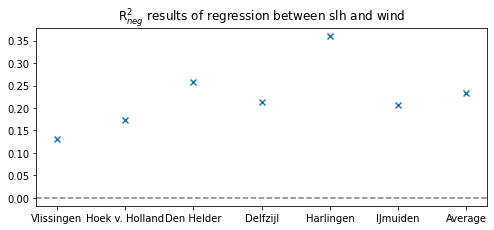

In [113]:
figs.plot_obs_result_per_station(results,'R$^2_{neg}$', model, data_type)

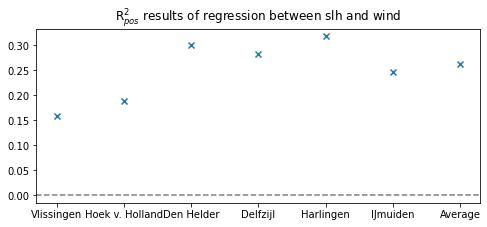

In [114]:
figs.plot_obs_result_per_station(results, 'R$^2_{pos}$', model, data_type)

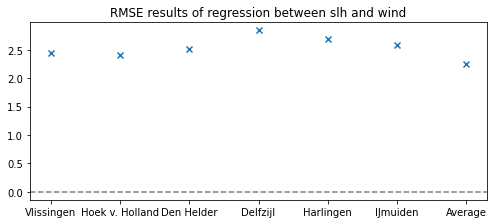

In [115]:
figs.plot_obs_result_per_station(results, 'RMSE', model, data_type)

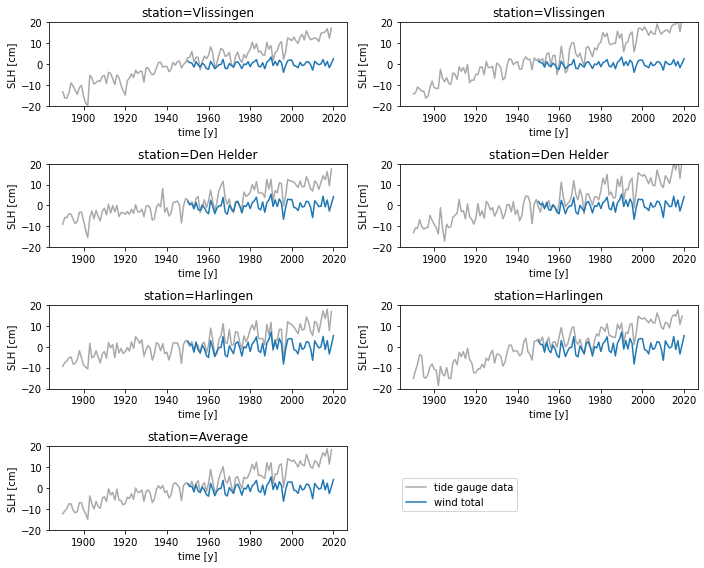

In [116]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries, ['wind total'], model, data_type)

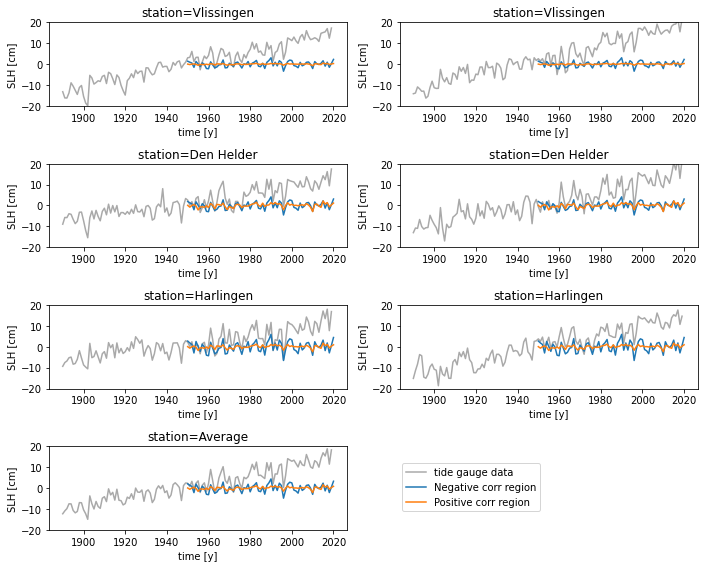

In [117]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries, ['Negative corr region', 'Positive corr region'], model, data_type)

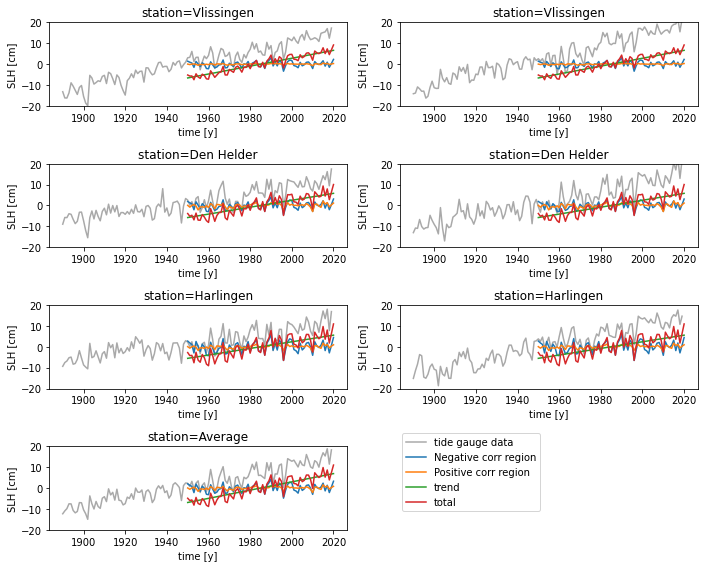

In [118]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries, ['Negative corr region', 'Positive corr region', 'trend', 'total'], model, data_type)

#### Plot trends

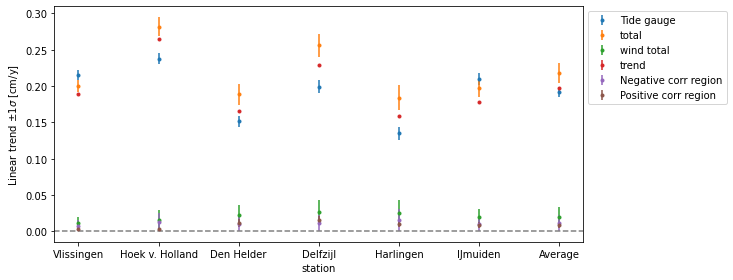

In [119]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries, ['total', 'wind total', 'trend', 'Negative corr region', 
                                                                  'Positive corr region'], model, data_type)

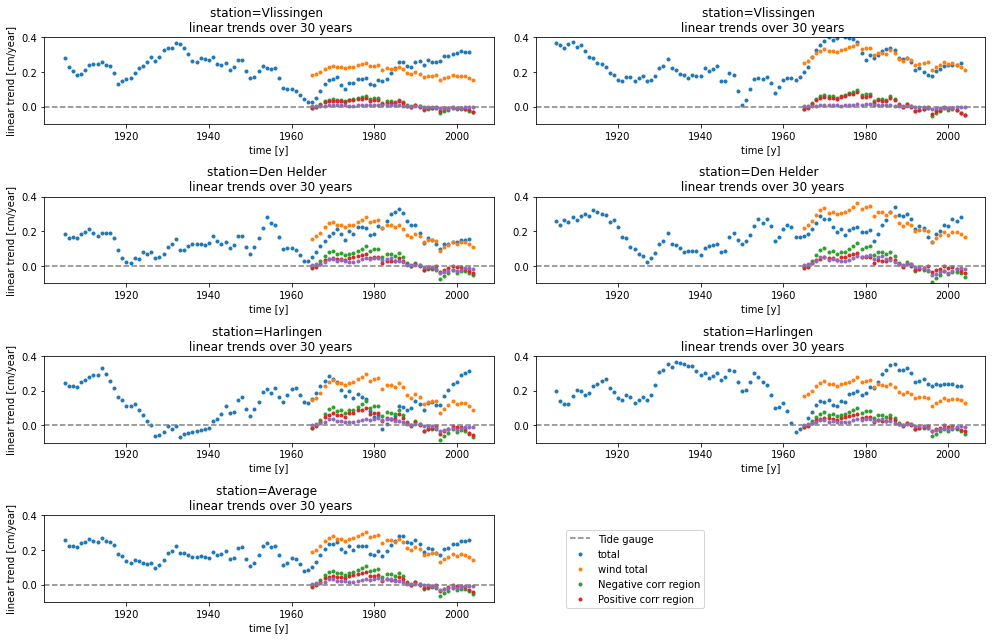

In [120]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries, ['total', 'wind total', 'Negative corr region', 'Positive corr region'], 30, model, data_type, errorbar = False)